Epoch 1/25
391/391 - 101s - loss: 1.7221 - accuracy: 0.3654 - val_loss: 1.4249 - val_accuracy: 0.4961 - 101s/epoch - 258ms/step
Epoch 2/25
391/391 - 90s - loss: 1.4207 - accuracy: 0.4896 - val_loss: 1.1882 - val_accuracy: 0.5717 - 90s/epoch - 230ms/step
Epoch 3/25
391/391 - 89s - loss: 1.3052 - accuracy: 0.5352 - val_loss: 1.1015 - val_accuracy: 0.6067 - 89s/epoch - 228ms/step
Epoch 4/25
391/391 - 88s - loss: 1.2486 - accuracy: 0.5550 - val_loss: 1.0098 - val_accuracy: 0.6479 - 88s/epoch - 226ms/step
Epoch 5/25
391/391 - 88s - loss: 1.2013 - accuracy: 0.5733 - val_loss: 1.0086 - val_accuracy: 0.6460 - 88s/epoch - 225ms/step
Epoch 6/25
391/391 - 89s - loss: 1.1633 - accuracy: 0.5903 - val_loss: 0.9920 - val_accuracy: 0.6453 - 89s/epoch - 226ms/step
Epoch 7/25
391/391 - 87s - loss: 1.1406 - accuracy: 0.5972 - val_loss: 0.9348 - val_accuracy: 0.6746 - 87s/epoch - 223ms/step
Epoch 8/25
391/391 - 87s - loss: 1.1142 - accuracy: 0.6039 - val_loss: 0.9253 - val_accuracy: 0.6771 - 87s/epoch - 2

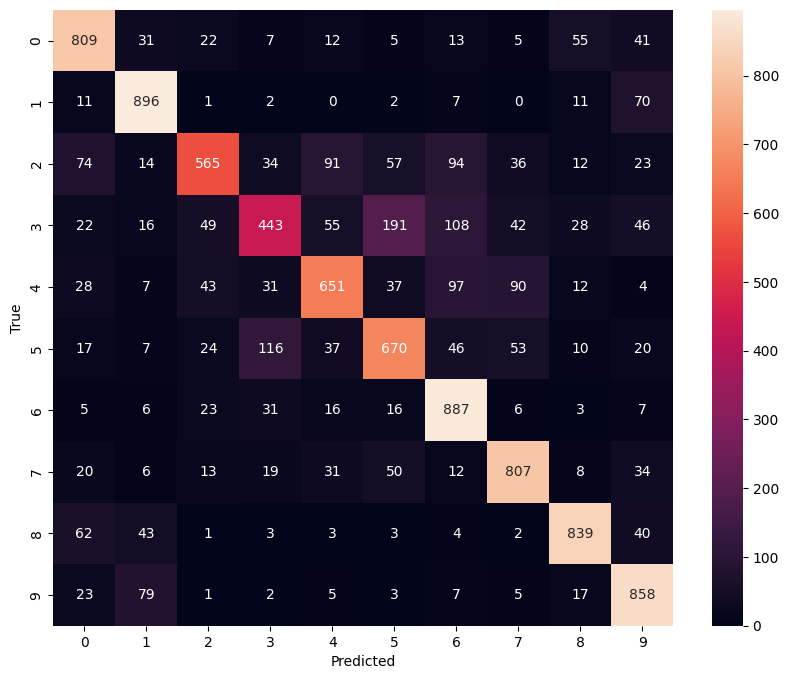

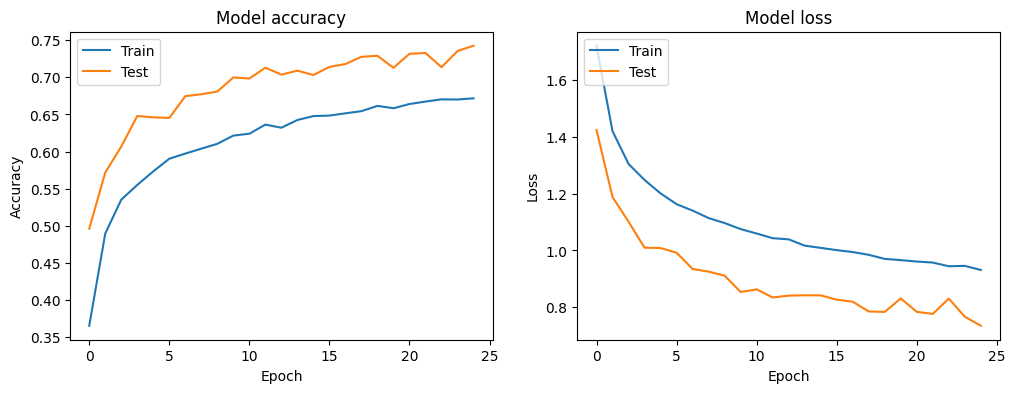

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten
from keras.optimizers import Adam
from keras.datasets import cifar10
from keras.utils import to_categorical
import time
from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
import os

# Set environment variable to avoid duplicate lib error
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

# Turn off warnings for cleaner looking notebook
import warnings
warnings.simplefilter('ignore')

# Load and preprocess the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the images to a range of 0 to 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert class vectors to binary class matrices (one-hot encoding)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Data augmentation
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
)

datagen.fit(x_train)

# Create a simplified model
model = Sequential()

# Add layers to the model
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Train the model with a smaller number of epochs for quick testing
history = model.fit(datagen.flow(x_train, y_train, batch_size=128),
                    validation_data=(x_test, y_test),
                    epochs=25,
                    callbacks=[early_stopping],
                    verbose=2)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc}')

# Predict the labels of the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Print classification report
print(classification_report(y_true, y_pred_classes))

# Print confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()


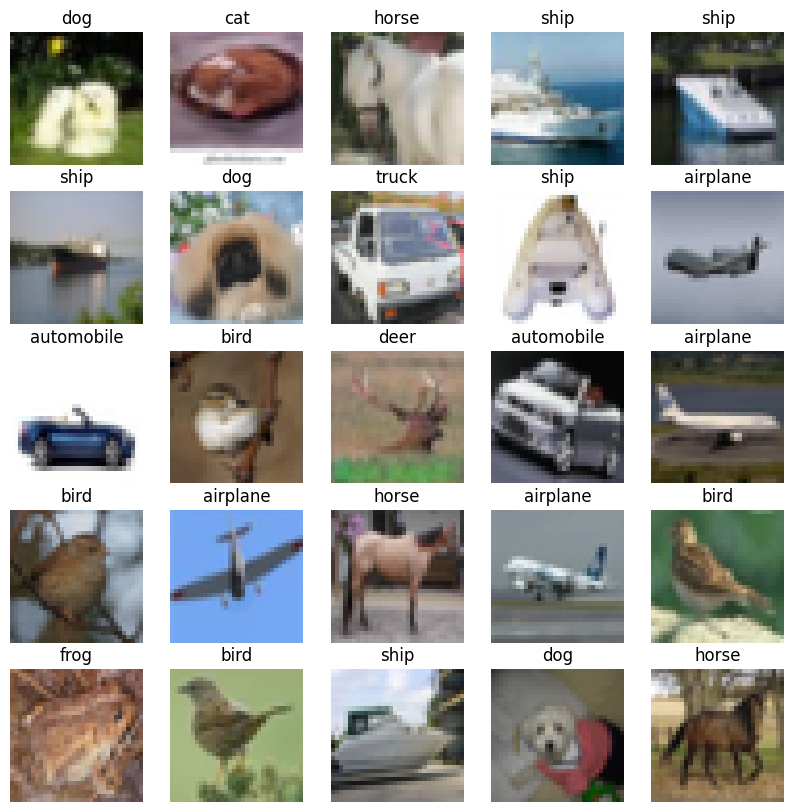

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10

# Load CIFAR-10 dataset
(_, _), (x_test, y_test) = cifar10.load_data()

# Define class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Plot random images from the dataset
plt.figure(figsize=(10, 10))
for i in range(25):
    # Generate a random index
    idx = np.random.randint(len(x_test))

    # Plot the image
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_test[idx])
    plt.title(class_names[int(y_test[idx])])
    plt.axis('off')

plt.show()